In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [ ]:
for col in df:
  if df[col].dtype == 'object':
    print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


In [ ]:
# 1. What are number of flights operated by each airline?
flights_per_airlines = df.groupby("airline").size().reset_index(name="Number of flights")
flights_per_airlines

,airline,Number of flights
0,AirAsia,16098
1,Air_India,80892
2,GO_FIRST,23173
3,Indigo,43120
4,SpiceJet,9011
5,Vistara,127859


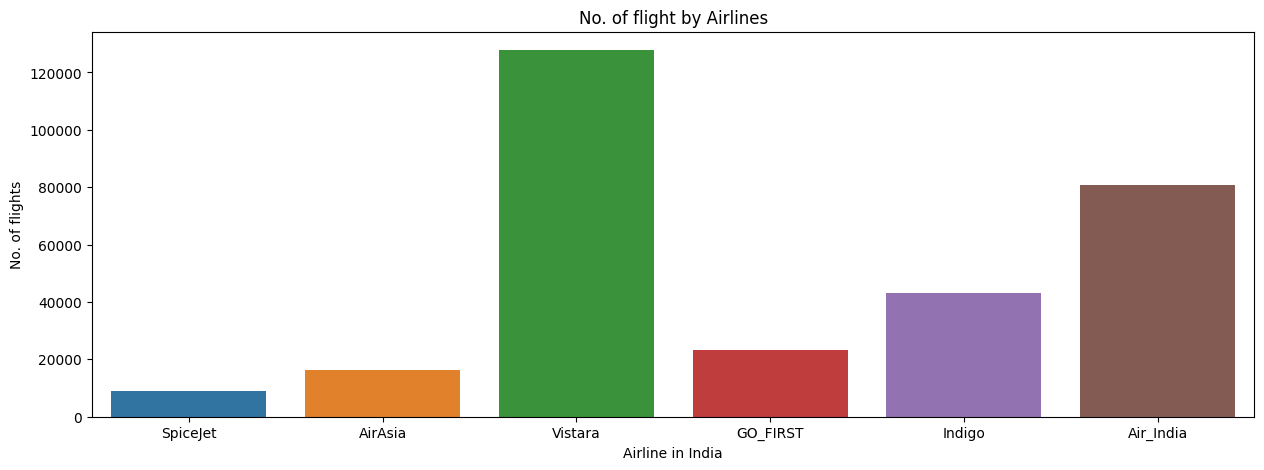

In [ ]:
# 1
from turtle import title
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = df)
NF.set(xlabel='Airline in India', ylabel='No. of flights', title='No. of flight by Airlines')
plt.show(NF)

In [ ]:
# 2. What is price range according to class of travel?
price_range_per_class = df.groupby("class")["price"].agg(["min","max"])
price_range_per_class

,min,max
class,,
Business,12000,123071
Economy,1105,42349


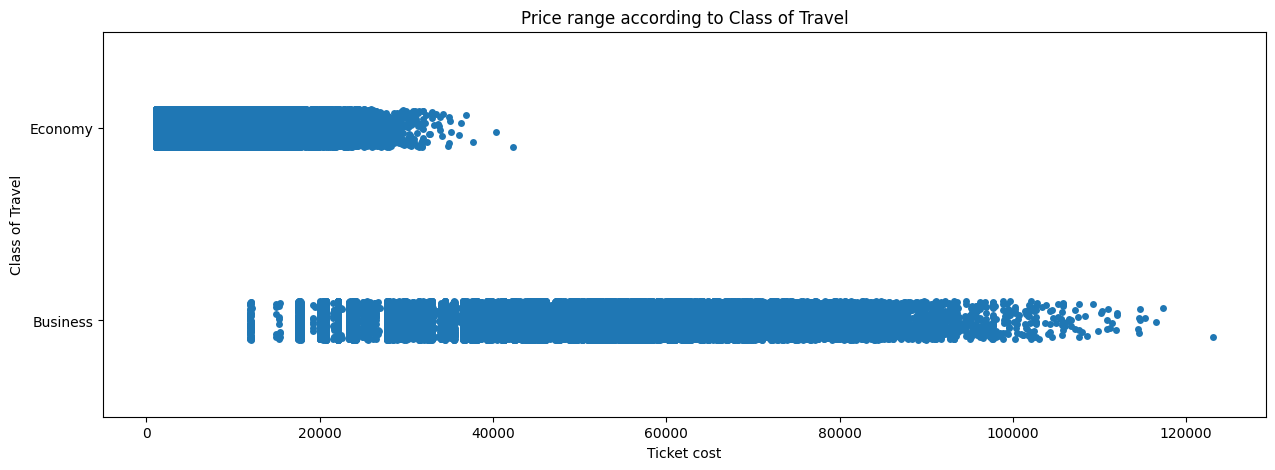

In [ ]:
# 2
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class', data = df)
CE.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Price range according to Class of Travel')
plt.show(CE)

In [ ]:
# 3. What is availability of Tickets according to class of travel?
availability_per_class = df.groupby("class").size().reset_index(name="Availability")
availability_per_class

,class,Availability
0,Business,93487
1,Economy,206666


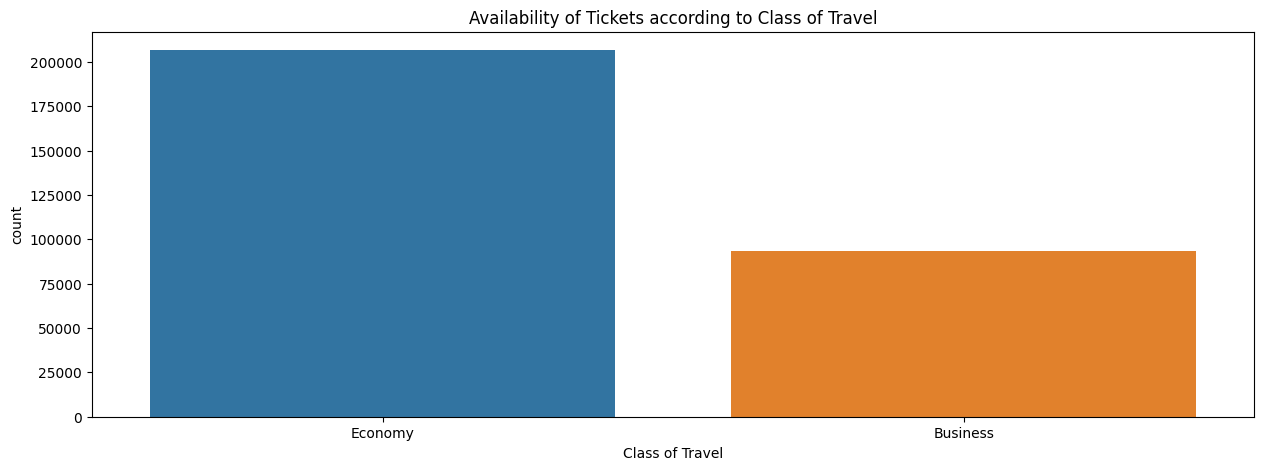

In [ ]:
# 3
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = df)
TA.set(xlabel='Class of Travel', title='Availability of Tickets according to Class of Travel')
plt.show(TA)

In [ ]:
# 4. What is price of ticket for different airlines based on duration of flight?
price_per_airline_duration = df.groupby(['airline','duration'])['price'].mean().reset_index()
price_per_airline_duration

,airline,duration,price
0,AirAsia,0.92,2137.000000
1,AirAsia,1.00,2123.644444
2,AirAsia,1.08,2581.423913
3,AirAsia,1.17,2372.707143
4,AirAsia,1.25,2181.877193
...,...,...,...
1592,Vistara,38.83,13840.000000
1593,Vistara,39.00,20293.000000
1594,Vistara,39.75,18746.500000
1595,Vistara,40.00,19400.000000


In [ ]:
# 5. How do ticket prices vary across different airlines and class of travel?
price_stats = df.groupby(['airline','class'])['price'].agg(['mean','min','max']).reset_index()
price_stats

,airline,class,mean,min,max
0,AirAsia,Economy,4091.072742,1105,31917
1,Air_India,Business,47131.039212,12000,90970
2,Air_India,Economy,7313.682169,1526,42349
3,GO_FIRST,Economy,5652.007595,1105,32803
4,Indigo,Economy,5324.216303,1105,31952
5,SpiceJet,Economy,6179.278881,1106,34158
6,Vistara,Business,55477.027777,17604,123071
7,Vistara,Economy,7806.943645,1714,37646


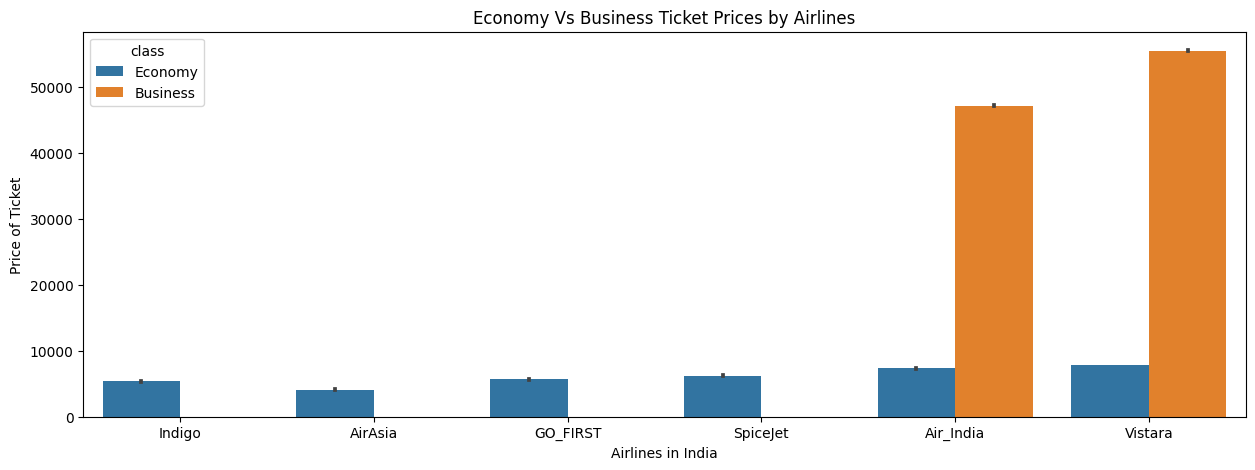

In [ ]:
# 5
plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(AS)

In [ ]:
# 6. How do airline ticket prices vary depending on when you buy them?
price_vary = df.groupby("days_left")["price"].agg(['mean','min','max']).reset_index()
price_vary

,days_left,mean,min,max
0,1,21591.867151,4452,116562
1,2,30211.299801,1977,114523
2,3,28976.083569,3361,123071
3,4,25730.905653,3362,110936
4,5,26679.773368,3361,117307
5,6,24856.493902,3361,105961
6,7,25588.367351,3361,105744
7,8,24895.883995,3361,102114
8,9,25726.246072,3197,98465
9,10,25572.819134,3197,107934


In [ ]:
# 6


In [ ]:
# 7. How does price of ticket vary depending on duration of flight?
# price_vary_duration = df.groupby('duration')['price'].agg('mean','min','max').reset_index()
# price_vary_duration
price_vary_duration = df.groupby("duration")["price"].agg(["mean", "min", "max"]).reset_index()
price_vary_duration

,duration,mean,min,max
0,0.83,1973.557692,1443,3498
1,0.92,2003.538462,1443,9557
2,1.00,2266.063660,1105,12136
3,1.08,2589.311031,1443,12118
4,1.17,2632.209375,1105,17548
...,...,...,...,...
471,44.50,32439.000000,32439,32439
472,45.83,25851.333333,12813,51928
473,47.08,17223.000000,17223,17223
474,47.75,31291.500000,7461,55122


In [ ]:
# 8. How does ticket price vary according to departure time and arrival time?
price_departure_vary = df.groupby(['departure_time','arrival_time'])['price'].agg(['mean','min','max']).reset_index()
price_departure_vary

,departure_time,arrival_time,mean,min,max
0,Afternoon,Afternoon,14741.746011,1105,74575
1,Afternoon,Early_Morning,21159.511401,3184,89359
2,Afternoon,Evening,15548.836651,1105,95684
3,Afternoon,Late_Night,10811.615662,1830,73376
4,Afternoon,Morning,26056.580994,3334,100276
5,Afternoon,Night,19097.798757,1105,111437
6,Early_Morning,Afternoon,16564.731082,1105,105744
7,Early_Morning,Early_Morning,9540.191523,1105,59491
8,Early_Morning,Evening,24804.077441,1543,117307
9,Early_Morning,Late_Night,29638.037500,2074,73376


In [ ]:
# 9. How does ticket price vary depending on source and destination?
price_source_vary = df.groupby(['source_city','destination_city'])['price'].agg(['mean','min','max']).reset_index()
price_source_vary

,source_city,destination_city,mean,min,max
0,Bangalore,Chennai,23321.850078,1603,90720
1,Bangalore,Delhi,17723.313972,2723,111883
2,Bangalore,Hyderabad,21226.121192,1694,83239
3,Bangalore,Kolkata,23500.061229,3026,105168
4,Bangalore,Mumbai,23128.618672,2150,103819
5,Chennai,Bangalore,25081.850454,1443,107597
6,Chennai,Delhi,18981.863948,2051,103683
7,Chennai,Hyderabad,21591.345404,1105,92752
8,Chennai,Kolkata,22669.932407,2359,104624
9,Chennai,Mumbai,22765.849647,1830,114704


In [ ]:
# 10. How does price of tickets vary based on no. of stops and airline?
price_stopping_vary = df.groupby(['stops','airline'])['price'].agg(['mean','min','max'])
price_stopping_vary

mean   min     max
stops       airline                              
one         AirAsia     4096.963741  1550   31917
            Air_India  24805.782885  1977   90970
            GO_FIRST    5972.272755  2212   32803
            Indigo      5733.028878  1105   31952
            SpiceJet    6789.364636  2491   34158
            Vistara    32353.149720  3229  123071
two_or_more AirAsia     4432.956367  1998   25406
            Air_India  13771.177062  1966   80756
            GO_FIRST    7107.708642  4337   14861
            Indigo      7834.838753  2103   29213
            Vistara    18850.767996  5294  117307
zero        AirAsia     3747.960970  1105   20402
            Air_India  14403.191918  1526   56788
            GO_FIRST    3526.924915  1105   20874
            Indigo      4023.049037  1105   21058
            SpiceJet    4556.430950  1106   20874
            Vistara    16416.273587  1714   59573